In [1]:
!pip install kaggle tensorflow numpy pandas matplotlib scikit-learn split-folders

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elhamlolo","key":"b56e2dd61367e682bf5fca1b0a1ea222"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images
#!unzip cifake-real-and-ai-generated-synthetic-images.zip -d dataset
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
!unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: datas

In [ ]:
#pip uninstall -y tensorflow keras
#pip install tensorflow
import os
import splitfolders
import random
import sys
import shutil
import logging
import cv2
import requests
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__())
from   tensorflow import keras
from   tensorflow.keras import layers
from   tensorflow.keras.models        import load_model
from   tensorflow.keras.applications  import VGG16, ResNet50, MobileNetV2,InceptionResNetV2, InceptionV3,DenseNet201, Xception, EfficientNetB0
from   tensorflow.keras.models        import Sequential, Model
from   tensorflow.keras.layers        import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from   tensorflow.keras.preprocessing import image
from   tensorflow.keras.preprocessing.image import ImageDataGenerator
from   keras.callbacks                import EarlyStopping
from   sklearn.metrics                import accuracy_score, confusion_matrix,  precision_score, recall_score, classification_report, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from   io                             import BytesIO
from   PIL                            import Image

In [6]:
print ("Python version is     : " , sys.version   )
print ("tensorflow version is : " , tf.__version__)

# Get detailed information about GPU(s)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("\nTensorFlow is using the following GPU(s):")
    for gpu in gpus:
        print(gpu)
else:
    print("\nNo GPU detected or TensorFlow is not configured to use one.")

#pip show tensorflow

Python version is     :  3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
tensorflow version is :  2.19.0

TensorFlow is using the following GPU(s):
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [8]:
environment = 'colab'

if environment =='colab':
  inputFolder  = '/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'
  outputFolder = '/content/dataset/CT_split/'
  results_path  = '/content/dataset/Results/'

else:
  inputFolder  = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\dataset\\All\\CT_dataset\\'
  outputFolder = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\dataset\\All\\CT_split\\'
  results_path  = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\Codes\My_Codes\\Results\\'

if not os.path.exists(results_path):
    os.makedirs(results_path)


<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
/tmp/ipython-input-3042539508.py:11: SyntaxWarning: invalid escape sequence '\M'
  results_path  = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\Codes\My_Codes\\Results\\'


In [28]:
# Split dataset into Train (80%), Validation (10%), Test (10%)
splitfolders.ratio(inputFolder, outputFolder, seed=42, ratio=(0.8, 0.1, 0.1))

Copying files: 12446 files [00:17, 722.80 files/s]


In [29]:
train_dir    = outputFolder + 'train'
val_dir      = outputFolder + 'val'
test_dir     = outputFolder + 'test'

classes      = ['Cyst', 'Normal', 'Stone', 'Tumor']
random.seed(42)

IMAGE_WIDTH  = 224
IMAGE_HEIGHT = 224
num_classes  = 4
img_size     = (IMAGE_WIDTH, IMAGE_HEIGHT)
batch_size   = 32

#Done: DenseNet201, MobileNetV2, EfficientNetB0, ResNet50

#models    = ['VGG16', 'VGG19', 'ResNet50', 'ResNet101', 'ResNet152', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetV2B0', 'EfficientNetB0', 'MobileNetV3Small', 'MobileNetV2' ,'InceptionResNetV2', 'InceptionV3', 'Xception']
models     = ['VGG16' , 'ResNet50' ,'MobileNetV2' ,'InceptionResNetV2','InceptionV3', 'DenseNet201', 'Xception','EfficientNetB0']
model_name = 'InceptionV3'
results_path= results_path + model_name+"/"
model_path =  results_path #+ '_20Epochs.h5'

if not os.path.exists(model_path):
    os.makedirs(model_path)


In [11]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(val_dir))
print("Test_dir Subfolders : ", os.listdir(test_dir))

Train_dir Subfolders:  ['Cyst', 'Stone', 'Tumor', 'Normal']
Valid_dir Subfolders:  ['Cyst', 'Stone', 'Tumor', 'Normal']
Test_dir Subfolders :  ['Cyst', 'Stone', 'Tumor', 'Normal']


In [12]:
image_train_gen =ImageDataGenerator(
                                    rescale           = 1./255,
                                    rotation_range    = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range= 0.1,
                                    horizontal_flip   = True,
                                    zoom_range        = 0.2
                                  )

image_valid_gen =ImageDataGenerator(
                                    rescale           = 1./255,
                                    rotation_range    = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range= 0.1,
                                    horizontal_flip   = True,
                                    zoom_range        = 0.2
                                  )

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_ds = image_train_gen.flow_from_directory(
                                                train_dir,
                                                target_size= img_size,
                                                batch_size = batch_size,
                                                class_mode = 'sparse',
                                              )

valid_ds = image_valid_gen.flow_from_directory(
                                                val_dir,
                                                target_size= img_size ,
                                                batch_size = batch_size,
                                                class_mode = 'sparse',
                                               )
test_ds = test_datagen.flow_from_directory(
                                            test_dir,
                                            target_size= img_size ,
                                            batch_size = batch_size,
                                            class_mode = 'sparse',
                                            shuffle=False
                                           )

Found 9955 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.


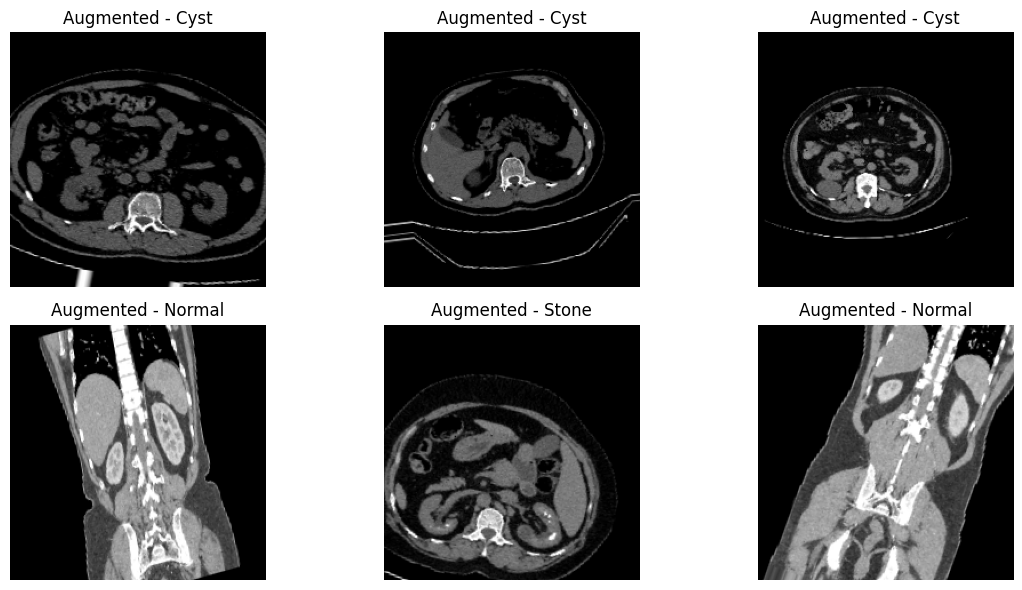

In [14]:
#show sample of augmented images
def show_augmented_images(dataset, num_images=6):

    images, labels = next(dataset)
    class_names    = list(dataset.class_indices.keys())

    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        img = images[i]
        label = class_names[int(labels[i])]

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Augmented - {label}")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(results_path+ 'augmented_samples.png', dpi=300, bbox_inches='tight')

    plt.show()

show_augmented_images(train_ds, num_images=6)

In [15]:
model        = InceptionV3(input_shape=(IMAGE_WIDTH , IMAGE_HEIGHT ,3), weights='imagenet', include_top=False, pooling='avg')

for layer in model.layers:
      layer.trainable = False

x     = Flatten()(model.output)
x     = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = model.input, outputs = x)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [16]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.summary()

In [17]:
EarlyStoppingMonitor  = EarlyStopping(patience=10)
history               = model.fit(train_ds, epochs= 20, validation_data=valid_ds, callbacks= [EarlyStoppingMonitor])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 214s 633ms/step - accuracy: 0.5821 - loss: 1.0145 - val_accuracy: 0.7705 - val_loss: 0.6212
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 185s 593ms/step - accuracy: 0.7853 - loss: 0.5668 - val_accuracy: 0.7834 - val_loss: 0.5320
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 170s 545ms/step - accuracy: 0.8177 - loss: 0.4795 - val_accuracy: 0.8285 - val_loss: 0.4507
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 170s 545ms/step - accuracy: 0.8456 - loss: 0.4298 - val_accuracy: 0.8575 - val_loss: 0.4040
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 153s 491ms/step - accuracy: 0.8553 - loss: 0.3961 - val_accuracy: 0.8277 - val_loss: 0.4562
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 159s 510ms/step - accuracy: 0.8682 - loss: 0.3671 - val_accuracy: 0.8325 - val_loss: 0.4364
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 156s 500ms/step - accuracy: 0.8713 - loss: 0.3615 - val_accuracy: 0.8696 - val_loss: 0.3511
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 155s 496ms/step - accuracy: 0.8759 -

In [18]:
model.save(model_path + '_20Epochs.keras')

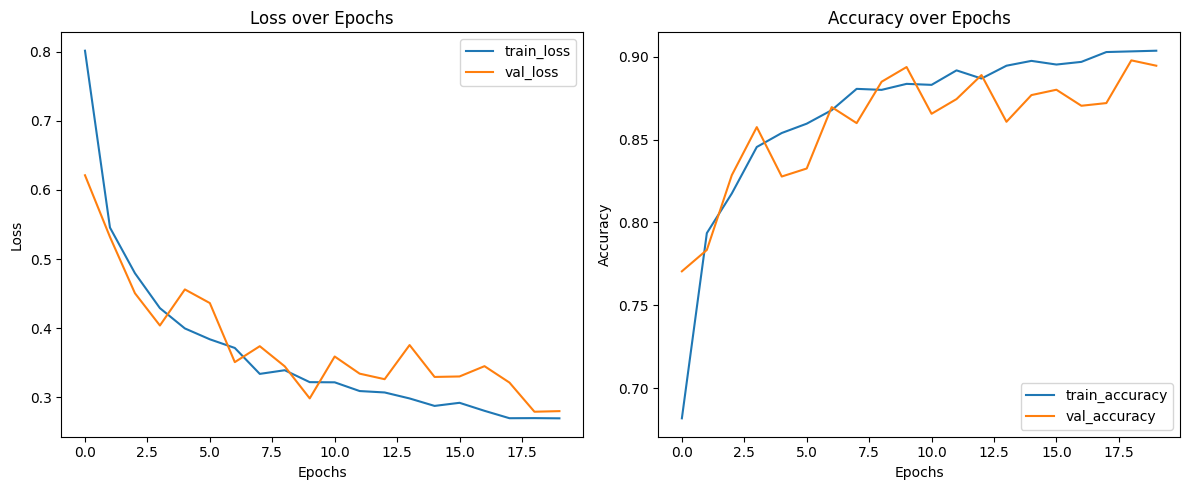

In [19]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss']    , label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy']    , label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend(loc='lower right')

plt.tight_layout()

# Save the figure
plt.savefig(results_path+ 'Loss_accuracy.png', dpi=300, bbox_inches='tight')

plt.show()

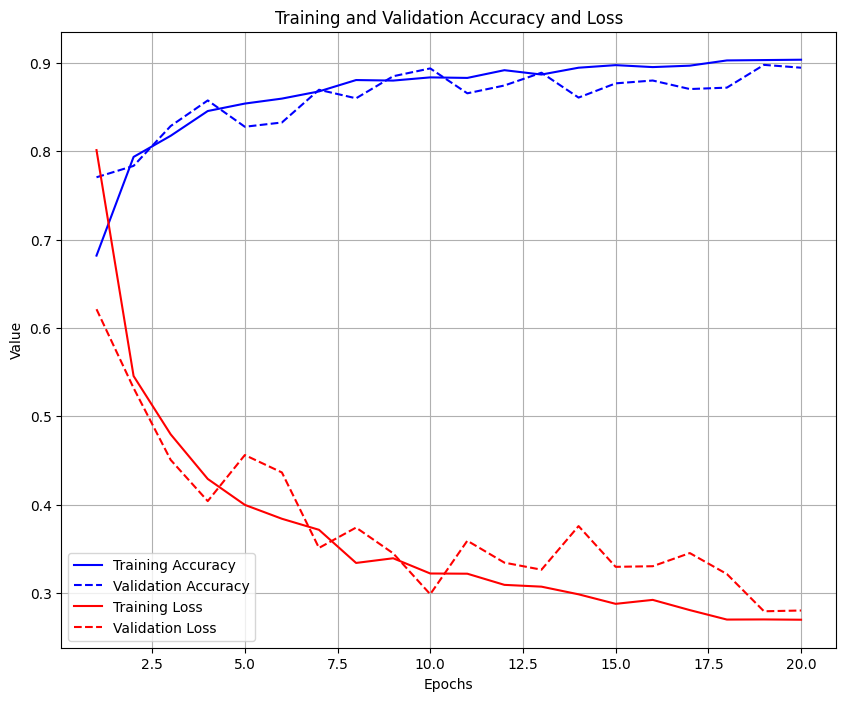

In [20]:
epochs  = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(10, 8))

# Plot accuracy
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b--', label='Validation Accuracy')

# Plot loss
plt.plot(epochs, history.history['loss'], 'r-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r--', label='Validation Loss')

plt.title('Training and Validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.savefig(results_path+ 'Loss_accuracy_oneFigure.png', dpi=300, bbox_inches='tight')

plt.show()

In [21]:
#1- Evaluate the model on the test data using `evaluate`
_, accuracy = model.evaluate(test_ds, batch_size=32)
print()
print('evaluation accuracy is :  %.3f' % (accuracy * 100.0))
print()

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - accuracy: 0.9535 - loss: 0.1710

evaluation accuracy is :  91.914



40/40 ━━━━━━━━━━━━━━━━━━━━ 18s 259ms/step


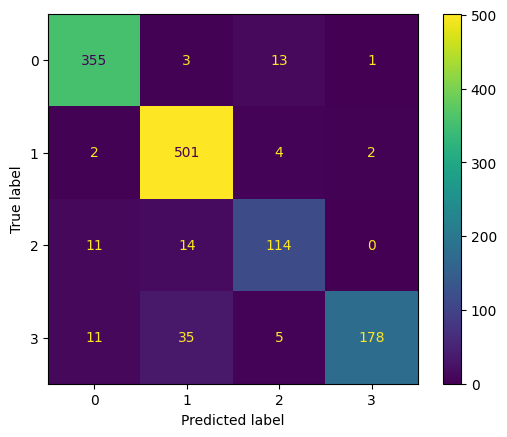

In [22]:
predictions            = model.predict(test_ds)
y_test                 = test_ds.classes

y_pred                 = np.argmax(predictions, axis=1)  # Get the index of the maximum value
cm                     = confusion_matrix(y_test, y_pred)

cmd                    = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(include_values= True, cmap='viridis', ax=None, xticks_rotation='horizontal')

# Save the figure
plt.savefig(results_path + 'Confusion Matrix.png', dpi=300, bbox_inches='tight')

plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       372
           1       0.91      0.98      0.94       509
           2       0.84      0.82      0.83       139
           3       0.98      0.78      0.87       229

    accuracy                           0.92      1249
   macro avg       0.92      0.88      0.90      1249
weighted avg       0.92      0.92      0.92      1249



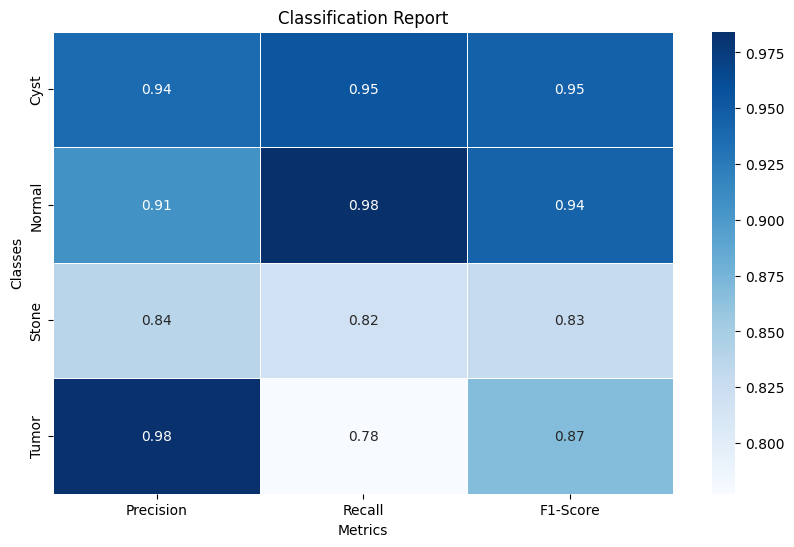

In [23]:
y_pred   = model.predict(test_ds)
y_test   = test_ds.classes

predicted_classes = [np.argmax(pred) for pred in predictions]

print(classification_report(y_test, predicted_classes))

report            = classification_report(y_test, predicted_classes, target_names=classes, output_dict=True)
metrics           = {label: report[label]        for label in classes if label in report}
precision_1       = [metrics[label]['precision'] for label in classes]
recall_1          = [metrics[label]['recall']    for label in classes]
f1_score_1        = [metrics[label]['f1-score']  for label in classes]

data = {
        'Precision': precision_1,
        'Recall'   : recall_1,
        'F1-Score' : f1_score_1
        }

df   = pd.DataFrame(data, index=classes)

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Save the figure
plt.savefig(results_path + 'Classification Report.png', dpi=300, bbox_inches='tight')

plt.show()

In [24]:
print ( ((precision_1[0]+ precision_1[1]+ precision_1[2]+ precision_1[3])/4)*100)
print ( ((recall_1[0]   + recall_1[1]   + recall_1[2]   + recall_1[3])/4)*100)
print ( ((f1_score_1[0] + f1_score_1[1] + f1_score_1[2] + f1_score_1[3])/4)*100)

91.60759051237402
88.400511106055
89.6573135510735


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step


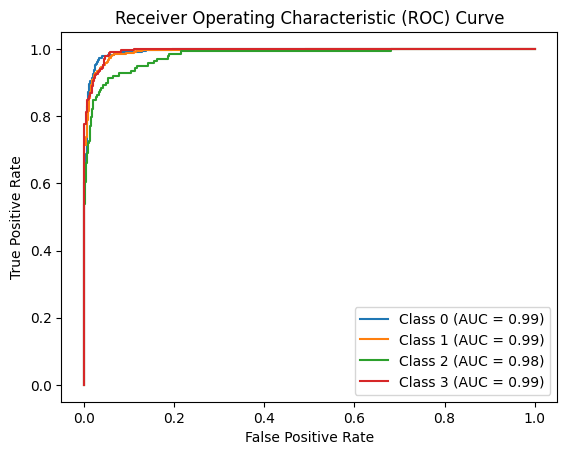

In [25]:
def plot_auc(predictions, y_test ):

    # Ensure that the target labels Y_test are in a 2-dimensional format
    if len(y_test.shape) == 1:
        y_test = np.eye(len(np.unique(y_test)))[y_test.astype(int)]

    # Compute the ROC curve and AUC score for each class
    fpr     = dict()
    tpr     = dict()
    roc_auc = dict()

    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
        roc_auc[i]        = roc_auc_score(y_test[:, i], predictions[:, i])

    # Plot the ROC curve for each class
    plt.figure()
    for i in range(y_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Set the title and axis labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # Save the figure
    plt.savefig(results_path + 'ROC.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

y_test = test_ds.classes
y_pred = model.predict(test_ds)
plot_auc(y_pred, y_test)


In [ ]:
# Extract true label from image path
def extract_true_label(img_path):

    print (img_path)
    folder_name = os.path.basename(os.path.dirname(img_path))
    print (folder_name)

    if "Cyst" in folder_name:
        return "Cyst"
    elif "Normal" in folder_name:
        return "Normal"
    elif "Stone" in folder_name:
        return "Stone"
    elif "Tumor" in folder_name:
        return "Tumor"

    return "Unknown"

# Load and preprocess image
def load_and_preprocess_image(img_path, target_size):

    if img_path.startswith('http'):
        response = requests.get(img_path)
        img      = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        img      = image.load_img(img_path)

    # Resize image explicitly
    img          = img.resize(target_size)

    # Convert to array and normalize
    img_array    = image.img_to_array(img) / 255.0
    img_array    = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

/content/dataset/CT_dataset/test/Cyst/Cyst- (100).jpg
Cyst
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


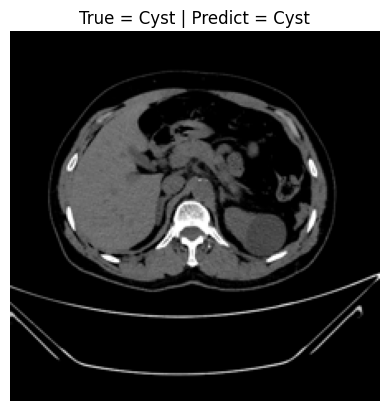

True = Cyst    Predict = Cyst


In [ ]:
# Image path (URL or local)
img_path = test_dir + '/Cyst/Cyst- (100).jpg'#Cyst- (4).jpg

# Extract true label
true_label     = extract_true_label(img_path)

# Load and preprocess image
img, img_array = load_and_preprocess_image(img_path, img_size)

# Make prediction
pred       = model.predict(img_array)
pred_index = np.argmax(pred,axis=1)

if pred_index[0]   == 0:
  predicted_label = "Cyst"

elif pred_index[0] == 1:
  predicted_label = "Normal"

elif pred_index[0] == 2:
  predicted_label = "Stone"

elif pred_index[0] == 3:
  predicted_label = "Tumor"

# Display image
plt.imshow(img)
plt.axis('off')
plt.title(f"True = {true_label} | Predict = {predicted_label}")
plt.show()

# Print result
print(f"True = {true_label}    Predict = {predicted_label}")

'\ncolors in papers:\nblue ...\nlightblue\norange\nmove\ngreen\nyellow\n'

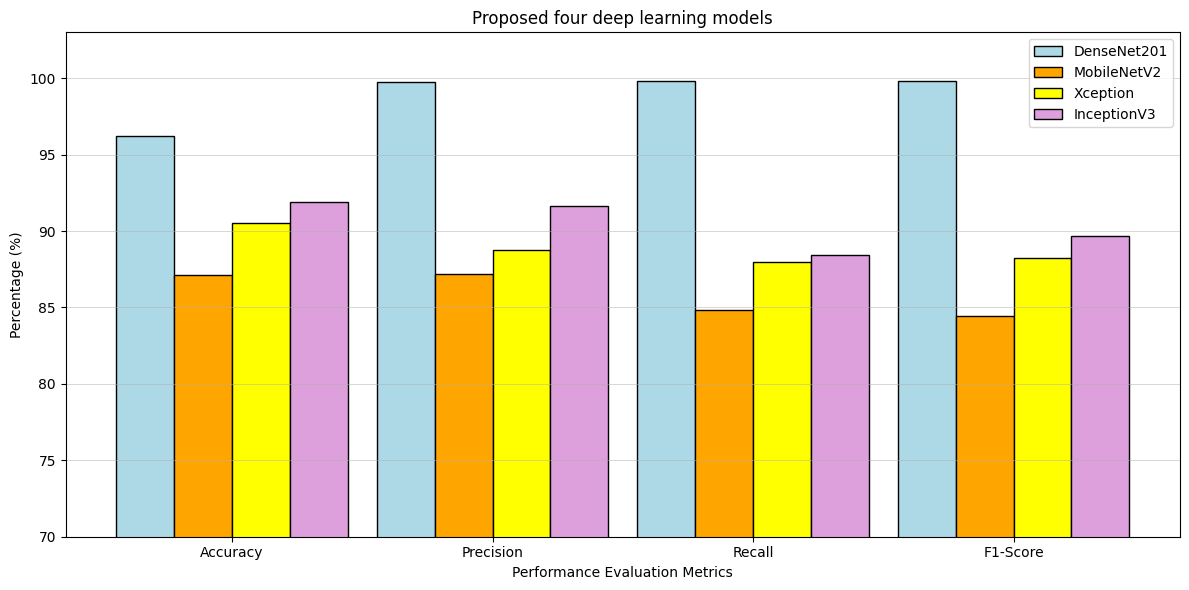

In [26]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])  # Placing text slightly above the bar

# Data
91.60759051237402
88.400511106055
89.6573135510735

metrics= ['DenseNet201', 'MobileNetV2', 'Xception', 'InceptionV3'] #exclude EffecientNet, ResNet
models = ['Accuracy'    ,'Precision', 'Recall', 'F1-Score']
data   = {
          'Accuracy' : [96.22,  87.11,  90.552, 91.914],
          'Precision': [99.75,  87.20,  88.74 , 91.61],
          'Recall'   : [99.82,  84.85,  87.98 , 88.40],
          'F1-Score' : [99.79,  84.47,  88.25 , 89.66]
          }

# Plotting
fig, ax   = plt.subplots(figsize=(12, 6))
bar_width = 0.2  # Width of each bar
space     = 0.1  # Space between model groups
positions = np.arange(len(models)) * (len(metrics) * bar_width + space)

#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Colors for metrics
colors  = ['lightblue', 'orange', 'yellow', 'plum']  # Colors for metrics

for i, metric in enumerate(metrics):
    # Collect metric values for all models
    values        = [data[model][i] for model in models]
    # Calculate bar positions for this metric
    bar_positions = positions + i * bar_width
    ax.bar(bar_positions, values, bar_width, label=metric, color=colors[i], edgecolor='black')

# Customize the plot
ax.set_xlabel('Performance Evaluation Metrics')
ax.set_ylabel('Percentage (%)')
ax.set_title('Proposed four deep learning models')
ax.set_xticks(positions + (len(metrics) * bar_width) / 2 - bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Adjust y-axis to focus on the range of interest
ax.set_ylim(70, 103)

# Add grid for better readability
ax.grid(True, axis='y', linewidth=0.5, linestyle='-', alpha=0.7)
#add_labels(metrics, data)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig(results_path+ model_name+'model_metrics_plot.png')

"""
colors in papers:
blue ...
lightblue
orange
move
green
yellow
"""

In [ ]:
#Grad-CAM
def get_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):

    grad_model = tf.keras.models.Model(
                                          [model.inputs],
                                          [model.get_layer(last_conv_layer_name).output, model.output]
                                      )

    with tf.GradientTape() as tape:

        last_conv_layer_output, preds = grad_model(img_array)

        if pred_index is None:
            pred_index = tf.cast(tf.round(preds[0]), tf.int32)

        class_channel  = preds[:, 0]

    grads                  = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads           = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap                = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap                = tf.squeeze(heatmap)
    heatmap                = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

def display_gradcam(img_path, heatmap, label, alpha=0.4):

    img     = cv2.imread(img_path)
    img     = cv2.resize(img, (299, 299))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title(f"{label} Kidney")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.title("Heatmap")
    plt.imshow(heatmap)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def apply_gradcam_to_image(model, img_path, label, last_conv_layer_name='block5_pool'):

    img       = image.load_img(img_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    heatmap   = get_gradcam_heatmap(model, img_array, last_conv_layer_name)

    display_gradcam(img_path, heatmap, label)

def apply_gradcam_to_random_fake_and_real(model, test_paths, test_labels, last_conv_layer_name='block5_pool'):

    # Separate Fake and Real images
    fake_paths = [path for path, label in zip(test_paths, test_labels) if label == 'Fake']
    real_paths = [path for path, label in zip(test_paths, test_labels) if label == 'Real']

    # Check if images exist
    if not fake_paths or not real_paths:
        print("Error: No Fake or Real images found in the test set.")
        return

    # Select one random image from each class
    fake_path = random.choice(fake_paths)
    real_path = random.choice(real_paths)

    # Apply Grad-CAM to the Fake image
    print(f"Applying Grad-CAM to Fake image: {fake_path}")
    apply_gradcam_to_image(model, fake_path, label="Fake", last_conv_layer_name=last_conv_layer_name)

    # Apply Grad-CAM to the Real image
    print(f"Applying Grad-CAM to Real image: {real_path}")
    apply_gradcam_to_image(model, real_path, label="Real", last_conv_layer_name=last_conv_layer_name)

# ========== Run the Code ==========
print("Selecting random Fake and Real images and applying Grad-CAM...")
apply_gradcam_to_random_fake_and_real(model, test_paths, test_labels, last_conv_layer_name='block14_sepconv2_act')


In [ ]:
def apply_gradcam(model, img_path, last_conv_layer_name, target_size=(224, 224), class_index=None):
    """
    Apply Grad-CAM to visualize model's attention.

    Args:
        model: Trained Keras model
        img_path: Path to input image
        last_conv_layer_name: Name of last convolutional layer in the model
        target_size: Size for resizing input image
        class_index: (Optional) index of class to explain. If None -> uses predicted class.

    Returns:
        superimposed image with Grad-CAM overlay
    """
    # -------------------------
    # 1. Preprocess image
    # -------------------------
    img = image.load_img(img_path, target_size=target_size)
    x   = image.img_to_array(img)
    x   = np.expand_dims(x, axis=0) / 255.0

    # -------------------------
    # 2. Build grad model
    # -------------------------
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # -------------------------
    # 3. Compute gradients
    # -------------------------
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(x)
        if class_index is None:
            class_index = np.argmax(predictions[0])
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0].numpy()
    pooled_grads = pooled_grads.numpy()

    # -------------------------
    # 4. Weight conv maps
    # -------------------------
    for i in range(pooled_grads.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap) + 1e-8)

    # -------------------------
    # 5. Overlay on image
    # -------------------------
    img_cv = cv2.imread(img_path)
    img_cv = cv2.resize(img_cv, target_size)

    heatmap = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img_cv, 0.6, heatmap, 0.4, 0)

    # -------------------------
    # 6. Display results
    # -------------------------
    plt.figure(figsize=(10,4))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(heatmap)
    plt.title("Heatmap")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM Overlay")
    plt.axis("off")

    plt.show()

    return superimposed_img

In [ ]:
model = tf.keras.models.load_model(model_path + '_20Epochs.keras')
apply_gradcam(model, "kidney_tumor_example.png", last_conv_layer_name="block5_conv3")
